In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train, Y_train) , (X_test , Y_test) = mnist.load_data(path="mnist.np2")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
Y_train.shape

(60000,)

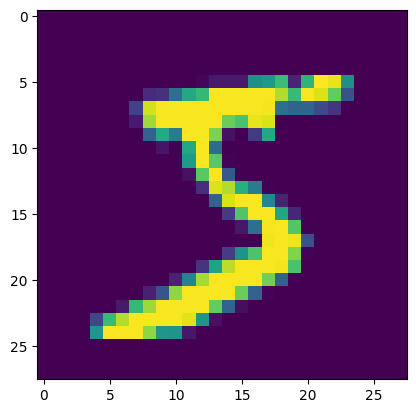

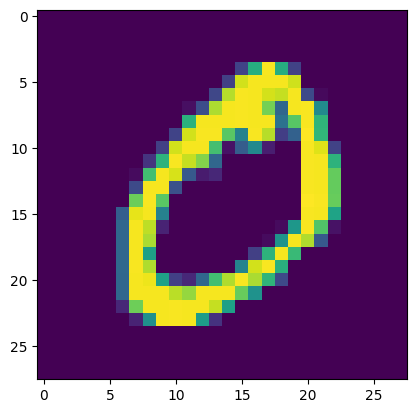

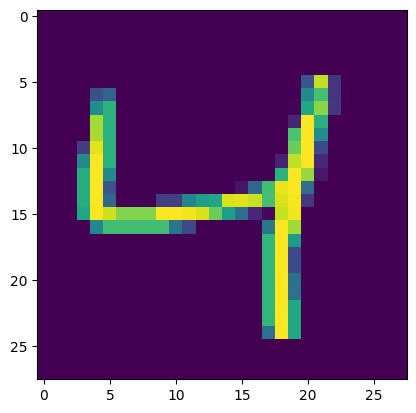

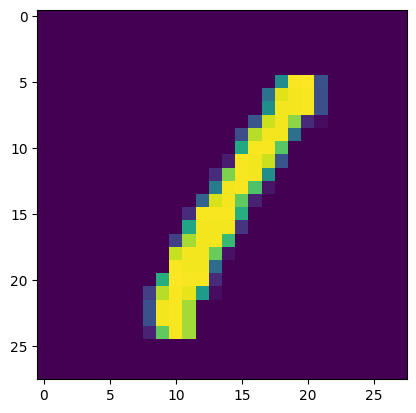

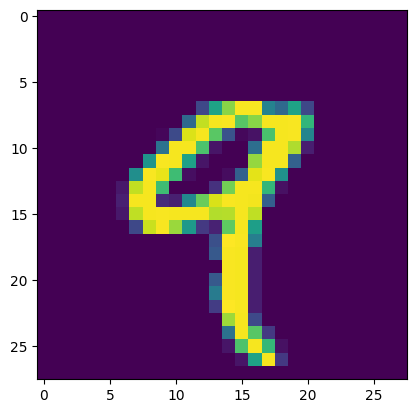

In [6]:
for i in range(0 , 5):
    plt.imshow(X_train[i])
    plt.show() #If this line is not used, only last plot will be shown  

**Finding unique values from labels**

In [7]:
t = np.unique(Y_train)
print(t)
t = np.unique(Y_test)
print(t)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**Normalizing values(values become 0 to 1 for efficient calculation)**

In [8]:
X_test = X_test/255
X_train = X_train/255

In [9]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Using ANN**

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # MNIST dataset images are 28×28 pixels (grayscale)
    
    # ReLU activation is used in hidden layers because it avoids the vanishing gradient problem 
    keras.layers.Dense(50, activation='relu'),  # 1st hidden layer with ReLU activation
    keras.layers.Dense(50, activation='relu'),  # 2nd hidden layer with ReLU activation
    
    # Softmax is typically used for multi-class classification, but sigmoid is used here
    keras.layers.Dense(10, activation='sigmoid')  # Output layer for 10 classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compiling neural network using loss function**

In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [12]:
#training data
model.fit(X_train , Y_train, epochs = 15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8453 - loss: 0.5207
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9524 - loss: 0.1596
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9670 - loss: 0.1121
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9744 - loss: 0.0874
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9790 - loss: 0.0702
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9829 - loss: 0.0576
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9851 - loss: 0.0499
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9876 - loss: 0.0423
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9893 - loss: 0.0361
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9905 - loss: 0.0322
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9915 - loss: 0.0287
Epoch 12/15
1875/1875 ━━━━━━━━

In [13]:
#test data
loss , accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9687 - loss: 0.1664


In [14]:
X_test.shape

(10000, 28, 28)

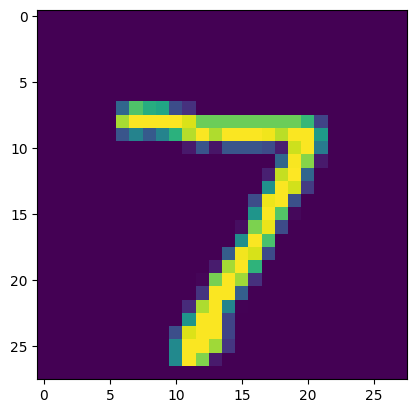

In [15]:
plt.imshow(X_test[0])

In [16]:
Y_test[0]

7

In [17]:
Y_pred = model.predict(X_test) #predict function predicts probability for each class

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**Converting the prediction probability to class label**

In [18]:
label_for_first_image = np.argmax(Y_pred[0]) #argmax prints the maximum valued index
label_for_first_image

7

In [19]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [20]:
conf_mat = confusion_matrix(Y_test , Y_pred_labels)

In [21]:
print(conf_mat)

tf.Tensor(
[[ 968    0    2    2    1    0    3    1    2    1]
 [   0 1117    3    3    0    0    4    1    6    1]
 [   5    2  997    6    4    1    5    3    9    0]
 [   0    0    6  983    0    3    0    7    1   10]
 [   1    0    6    0  952    0   12    5    0    6]
 [   3    0    1   15    1  857    6    1    3    5]
 [   4    1    1    0    0    5  946    0    1    0]
 [   3    0    9    4    2    0    0  993    3   14]
 [   5    0    6   15    1   12    3    2  927    3]
 [   2    2    0    4   16    3    0    1    1  980]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

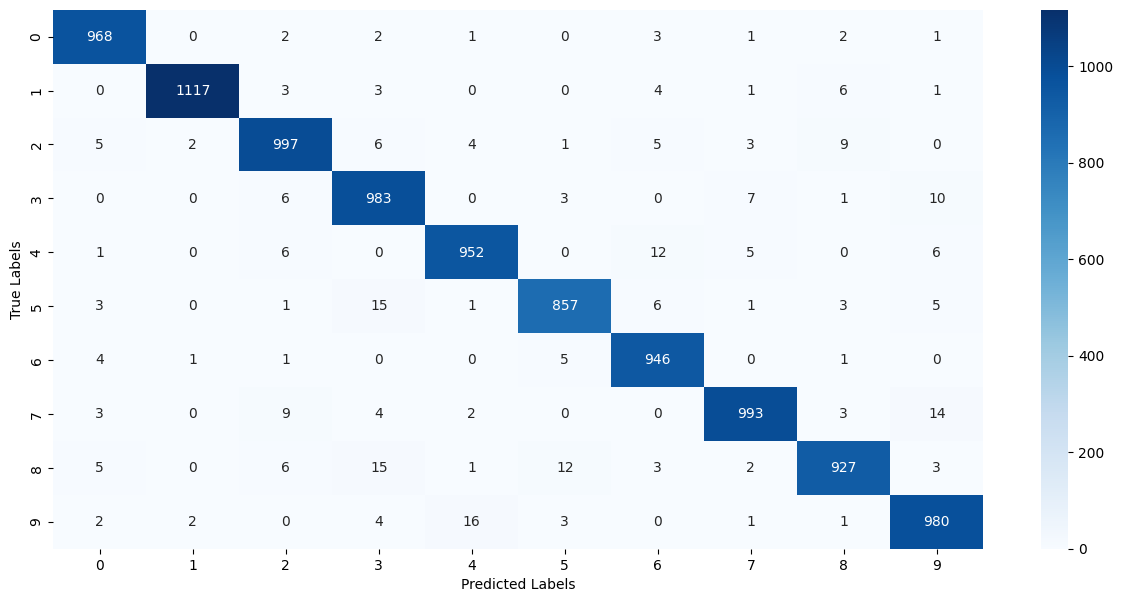

In [22]:
plt.figure(figsize = (15 , 7))
sns.heatmap(conf_mat , annot = True , fmt = 'd', cmap='Blues') #conf mat is the data needed, annotation is the values be visible or not, fmt is the number type: decimal or binary
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building a predicting system**